<a href="https://colab.research.google.com/github/MariiaSam/data_science/blob/main/Food_Demand_Forecasting_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predict the amount of orders per week**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
train_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Colab/Food Demand/train_food_demand_forecasting.csv')
test_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Colab/Food Demand/test_food_demand_forecasting.csv')


In [7]:
train_data.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [8]:
train_data.tail()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729
456547,1361984,145,61,2490,292.03,290.03,0,0,162


In [9]:

test_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [ ]:
meal_data = pd.read_csv(('/content/drive/My Drive/Colab Notebooks/Colab/Food Demand/meal_info.csv'), index_col=0)
meal_data.head()

In [11]:
meal_data = meal_data.reset_index(drop=False) # Resets the index of the DataFrame, making the current index values a new column and assigning a new sequential index.
meal_data.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [12]:

meal_data.tail()

,meal_id,category,cuisine
46,2956,Fish,Continental
47,2104,Fish,Continental
48,2444,Seafood,Continental
49,2867,Seafood,Continental
50,1445,Seafood,Continental


In [13]:
#  how many categories and different types of meals

meal_data[['category', 'meal_id']].groupby(['category']).count()


,meal_id
category,
Beverages,12
Biryani,3
Desert,3
Extras,3
Fish,3
Other Snacks,3
Pasta,3
Pizza,3
Rice Bowl,3


In [14]:
train_data = train_data.merge(meal_data, on='meal_id', how='left')
train_data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian
...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,Desert,Indian
456544,1062036,145,61,2304,482.09,482.09,0,0,42,Desert,Indian
456545,1110849,145,61,2664,237.68,321.07,0,0,501,Salad,Italian
456546,1147725,145,61,2569,243.50,313.34,0,0,729,Salad,Italian


In [15]:
train_data[['category', 'meal_id']].groupby(['category']).count().sort_values(by='meal_id', ascending=False)

,meal_id
category,
Beverages,127890
Rice Bowl,33408
Sandwich,33291
Pizza,33138
Starters,29941
Other Snacks,29379
Desert,29294
Salad,28559
Pasta,27694


In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
dtypes: float64(2), int64(7), object(2)
memory usage: 38.3+ MB


In [17]:
for i in range(146):
  slice = train_data[train_data['week'] == 1]
  length = len(slice)
  unique_ids = len(slice['meal_id'].unique())
  if length != unique_ids:
    print(f'Week {i} has more than one entry per meal_id, {length} {unique_ids}')

Week 0 has more than one entry per meal_id, 2922 45
Week 1 has more than one entry per meal_id, 2922 45
Week 2 has more than one entry per meal_id, 2922 45
Week 3 has more than one entry per meal_id, 2922 45
Week 4 has more than one entry per meal_id, 2922 45
Week 5 has more than one entry per meal_id, 2922 45
Week 6 has more than one entry per meal_id, 2922 45
Week 7 has more than one entry per meal_id, 2922 45
Week 8 has more than one entry per meal_id, 2922 45
Week 9 has more than one entry per meal_id, 2922 45
Week 10 has more than one entry per meal_id, 2922 45
Week 11 has more than one entry per meal_id, 2922 45
Week 12 has more than one entry per meal_id, 2922 45
Week 13 has more than one entry per meal_id, 2922 45
Week 14 has more than one entry per meal_id, 2922 45
Week 15 has more than one entry per meal_id, 2922 45
Week 16 has more than one entry per meal_id, 2922 45
Week 17 has more than one entry per meal_id, 2922 45
Week 18 has more than one entry per meal_id, 2922 45
Wee

In [18]:
train_data[train_data['week'] == 1][['meal_id', 'center_id', 'week']].groupby(['meal_id', 'center_id']).count()

week
meal_id center_id      
1062    10            1
        11            1
        13            1
        14            1
        17            1
...                 ...
2867    145           1
        146           1
        152           1
        153           1
        174           1

[2922 rows x 1 columns]

In [19]:
any(train_data[train_data['week'] == 1][['meal_id', 'center_id', 'week']].groupby(['meal_id', 'center_id']).count()['week']>1)

False

In [20]:
for i in range(146):
  slice = train_data[train_data['week'] == i]
  more_than_one = any(train_data[train_data['week'] == 1][['meal_id', 'center_id', 'week']].groupby(['meal_id', 'center_id']).count()['week']>1)
  if more_than_one:
    print(f'Week {i} has more than one entry per meal_id')

In [21]:
train_data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian
...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,Desert,Indian
456544,1062036,145,61,2304,482.09,482.09,0,0,42,Desert,Indian
456545,1110849,145,61,2664,237.68,321.07,0,0,501,Salad,Italian
456546,1147725,145,61,2569,243.50,313.34,0,0,729,Salad,Italian


In [22]:
df = train_data[:]
test_data = df[df['week'] == 145] # take the last week
train_data = df[df['week'] != 145]

In [23]:
len(test_data)

3268

In [24]:
df1, df2 = train_test_split(df, shuffle=False, test_size=len(test_data))
df1.tail() # train

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
453275,1182399,144,61,1543,483.09,483.09,0,0,123,Desert,Indian
453276,1038573,144,61,2304,483.09,483.09,0,0,13,Desert,Indian
453277,1386481,144,61,2664,243.47,321.07,1,0,770,Salad,Italian
453278,1091332,144,61,2569,246.41,314.34,1,0,811,Salad,Italian
453279,1241543,144,61,2490,290.03,292.03,0,0,190,Salad,Italian


In [25]:
df2.head() # test

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
453280,1336751,145,55,1885,156.23,156.23,0,0,121,Beverages,Thai
453281,1401715,145,55,1993,159.14,158.14,0,0,54,Beverages,Thai
453282,1428343,145,55,2539,158.11,160.11,0,0,135,Beverages,Thai
453283,1040648,145,55,2139,292.03,292.03,0,0,15,Beverages,Indian
453284,1482790,145,55,2631,165.93,165.93,0,0,96,Beverages,Indian


In [26]:
train_data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian
...,...,...,...,...,...,...,...,...,...,...,...
453275,1182399,144,61,1543,483.09,483.09,0,0,123,Desert,Indian
453276,1038573,144,61,2304,483.09,483.09,0,0,13,Desert,Indian
453277,1386481,144,61,2664,243.47,321.07,1,0,770,Salad,Italian
453278,1091332,144,61,2569,246.41,314.34,1,0,811,Salad,Italian


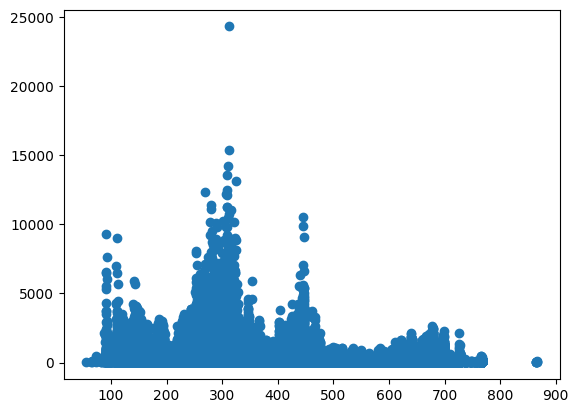

In [27]:
plt.scatter(train_data['base_price'], train_data['num_orders'])

<Axes: xlabel='base_price', ylabel='num_orders'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


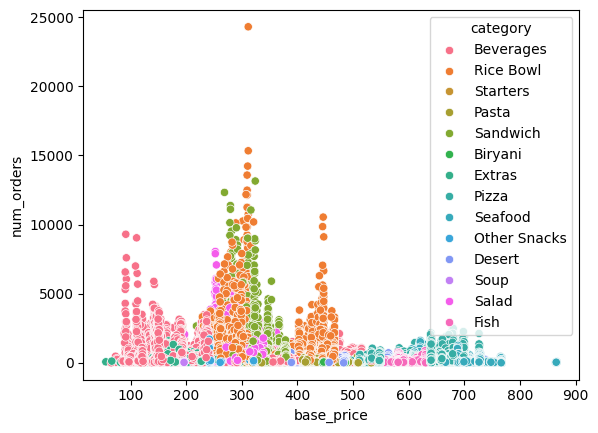

In [28]:
sns.scatterplot(x='base_price', y='num_orders', hue='category', data=train_data)

<Axes: xlabel='base_price', ylabel='num_orders'>

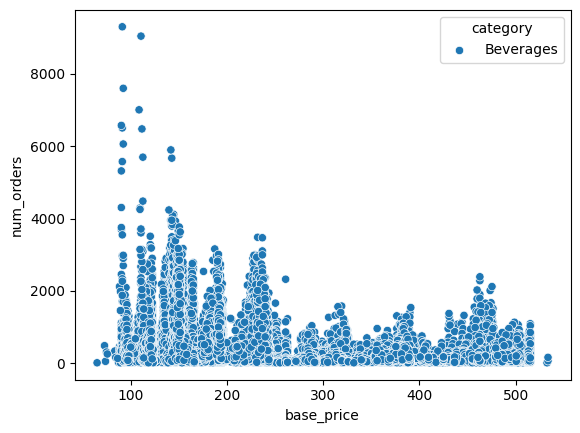

In [29]:
sns.scatterplot(x='base_price', y='num_orders', hue='category', data=train_data[train_data['category'] == 'Beverages'])

In [30]:
train_data_beverages = train_data[train_data['category'] == 'Beverages']
test_data_beverages = test_data[test_data['category'] == 'Beverages']

In [44]:
x = train_data_beverages['base_price'].to_numpy().reshape(-1, 1)
y = test_data_beverages['num_orders'].to_numpy()



In [38]:
x

array([[152.29],
       [135.83],
       [135.86],
       ...,
       [367.63],
       [369.63],
       [355.99]])

In [56]:
y.flatten()

array([ 121,   54,  135,   15,   96,   68,  189,  258,  162,   42,   96,
        204, 1890,  391,  351,  176,  634,  782, 1012,  162,  109,  202,
       1621,  203,  447,  122,   69,   82,  769,  728, 1202,  188,  136,
        229,  905,  271,  312,   26,   96,   67,  352,  540,  501,  244,
        244,  149,  324,  310,   96,   94,   96,   13,  244,  338,  364,
        108,  107,  121, 2822,  703,  485,   69,  215,   94,  906,  810,
       2308,   41,  108,  257,  663,  203,  216,   68,   40,   68,  378,
        528,  418,  162,  108,  189, 2133,  459,  555,  135,  296,  134,
        675,  946, 1295,  149,   80,  298,  350,  175,  134,   42,  122,
         82,  297,  231,  188,   94,   40,   53,  257,   96,   53,   26,
         68,  176,  485,  175,  148,   68,  162,  339,  202,  163,   54,
         94,  108,  149,  607,  325,  107,   28,   28,  107,  136,   42,
         40,   41,   13,  216,  432,   42,  162,   95,  162,  487,  189,
         82,   27,  121,   54,  123,  420,  257,   

In [57]:
model = LinearRegression()
model.fit(x, y)

ValueError: Found input variables with inconsistent numbers of samples: [126993, 1]